<table>
    <tr>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/d/d1/Delta_logo.svg" width="200"/></td>
        <td><img src="https://upload.wikimedia.org/wikipedia/en/e/e0/United_Airlines_Logo.svg" width="200"/></td>
        <td><img src="https://upload.wikimedia.org/wikipedia/en/2/23/American_Airlines_logo_2013.svg" width="200"/></td>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Southwest_Airlines_logo_2014.svg" width="200"/></td>
    </tr>
</table>

# Airline Passenger Satisfaction
## COMM 4522 Final Project

**Group Members**  
Ethan Chen (ec5rdn)  
Jingxuan Liu (jl2hv)  
Iain Muir (iam9ez)  
Boris Topalov (bnt4yb)  

**Date**  
April 28th, 2022

## Kaggle Source

[Link](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) to Dataset

## Table of Contents

* **0. Import Packages + Load Data**
* **1. Exploratory Data Analysis**
    * 1.1 Quick Overview
    * 1.2 Precursory Data Prep
    * 1.3 Data Summary and Viz
* **2. Data Preprocessing**
    * 2.1 Feature Engineering
    * 2.2 Cleaning Pipeline
    * 2.3 Helper Functions
* **3. Model Building**
    * 3.1 Decision Tree Classifier
    * 3.2 Random Forest Classfiier
    * 3.3 XGBoost Classifier
    * 3.4 Gradient Boosting Classifier
    * 3.5 Keras Neural Network
    * 3.6 Initial Model Results
* **4. Hyperparameter Tuning**
    * 4.1 Decision Tree Classfiier
    * 4.2 Random Forest Classfiier
    * 4.3 XGBoost Classifier
    * 4.4 Gradient Boosting Classifier
    * 4.5 Tuned Model Results
* **5. Final Testing**
    * 5.1 Test Set Preprocessing
    * 5.2 Optimal Model Performance
    * 5.3 Feature Importance

## 0. Import Packages + Load Data

Machine Learning Packages

In [1]:
!pip install category_encoders
!pip install tensorflow
!pip install shap --user
!pip install mlxtend
!pip install xgboost

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow import keras
import tensorflow as tf

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn import tree
import mlxtend

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Standard Packages

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
# import mlxtend
# import shap
import os

Setup

In [6]:
# Ensure notebook's output is stable across runs
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
ROOT = os.getcwd()
SLASH = '\\' if "C:\\" in ROOT else "/"
DATA = ROOT + f"{SLASH}data{SLASH}"

Load Data

In [7]:
train = pd.read_csv(
    DATA + "train.csv",
    index_col=0
)
test = pd.read_csv(
    DATA + "test.csv",
    index_col=0
)

Data Dictionary

| Column | Description | Values |
|--------|-------------|--------
| Gender | Gender of the passengers | Female, Male |
| Customer Type | Type of Customer | Loyal customer, disloyal customer |
| Age | The actual age of the passengers | |
| Type of Travel | Purpose of the flight of the passengers | Personal Travel, Business Travel |
| Class | Travel class in the plane of the passengers | Business, Eco, Eco Plus |
| Flight distance | The flight distance of this journey | |
| Inflight wifi service | Satisfaction level of the inflight wifi service | 0:N/A; 1-5 | 
| Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient | 0:N/A; 1-5 | 
| Ease of Online booking | Satisfaction level of online booking | 0:N/A; 1-5 | 
| Gate location | Satisfaction level of Gate location | 0:N/A; 1-5 | 
| Food and drink | Satisfaction level of Food and drink | 0:N/A; 1-5 | 
| Online boarding | Satisfaction level of online boarding | 0:N/A; 1-5 | 
| Seat comfort | Satisfaction level of Seat comfort | 0:N/A; 1-5 | 
| Inflight entertainment | Satisfaction level of inflight entertainment | 0:N/A; 1-5 | 
| On-board service | Satisfaction level of On-board service | 0:N/A; 1-5 | 
| Leg room service | Satisfaction level of Leg room service | 0:N/A; 1-5 | 
| Baggage handling | Satisfaction level of baggage handling | 0:N/A; 1-5 | 
| Check-in service | Satisfaction level of Check-in service | 0:N/A; 1-5 | 
| Inflight service | Satisfaction level of inflight service | 0:N/A; 1-5 | 
| Cleanliness | Satisfaction level of Cleanliness | 0:N/A; 1-5 | 
| Departure Delay in Minutes | Minutes delayed when departure | |
| Arrival Delay in Minutes | Minutes delayed when Arrival | |
| Satisfaction | Airline satisfaction level | Satisfaction, Neutral/Dissatisfaction|

## 1. Exploratory Data Analysis

### 1.1 Quick Overview

In [9]:
train.shape

(103904, 24)

In [10]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [12]:
print('Total Missing Values:', train.isnull().sum().sum())
train.isnull().sum()

Total Missing Values: 310


id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Target Data Balance

In [13]:
TARGET = 'satisfaction'
counts = train[TARGET].value_counts()
counts

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

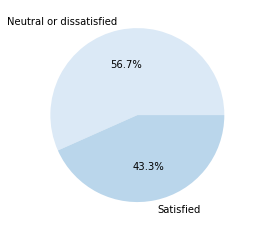

In [14]:
plt.pie(
    train[TARGET].value_counts(), 
    labels=["Neutral or dissatisfied", "Satisfied"], 
    colors=sns.color_palette("Blues"), 
    autopct='%1.1f%%'
)
plt.show()

### 1.2 Precursory Data Prep

In [15]:
# Convert Target Variable to Binary (0/1)
train[TARGET] = np.where(
    train[TARGET] == "satisfied",
    1,
    0
)
train[TARGET] = train[TARGET]

In [10]:
# Drop Useless Columns
train.drop(
    columns=['id'],
    inplace=True
)

In [17]:
# Replace 0 with NaN
# ---> 0 actually is missing value for rating columns
print("Actual Number of Missing Values for Ratings:", (train[train.columns.tolist()[6:20]] == 0).sum().sum())
train[train.columns.tolist()[6:20]] = train[train.columns.tolist()[6:20]].replace(0, np.nan)

Actual Number of Missing Values for Ratings: 15932


### 1.3 Data Summary and Viz

###### All Variables

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


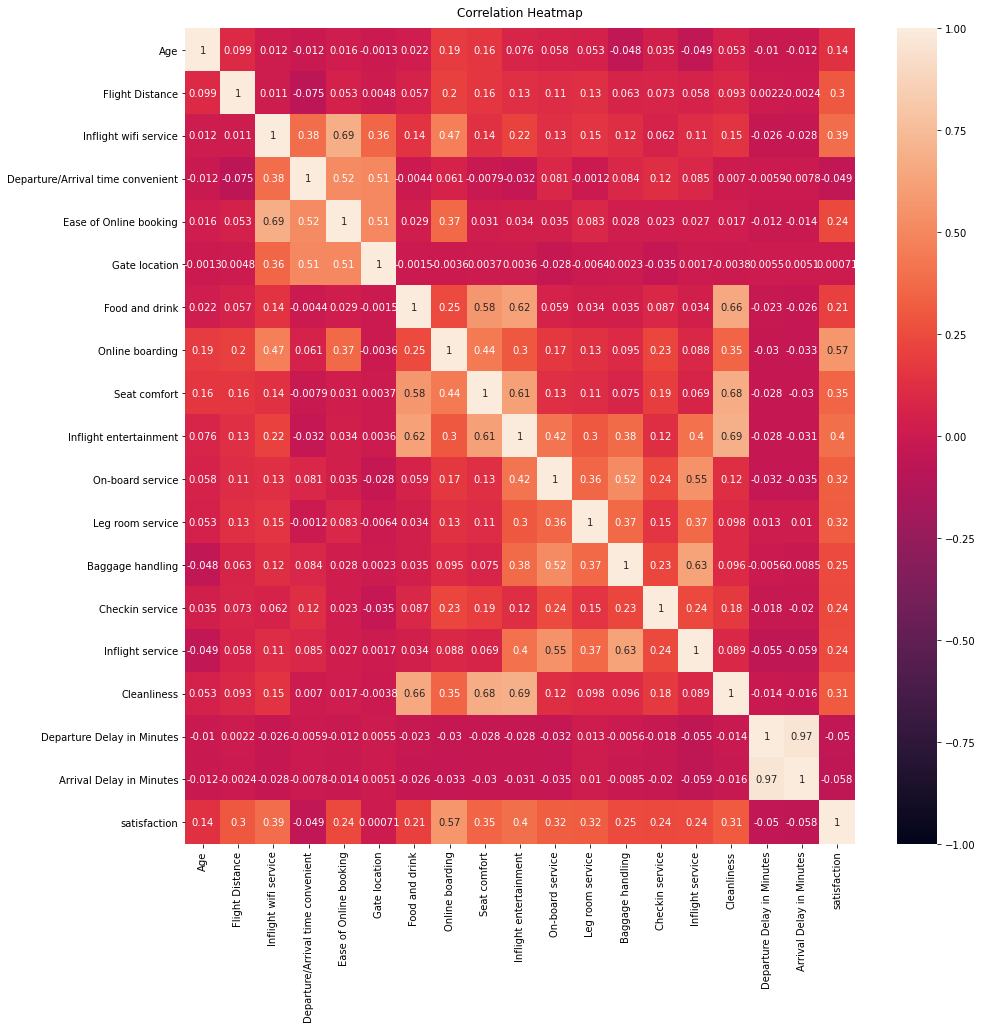

In [19]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(
    train.corr(), vmin=-1, vmax=1, annot=True
)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

###### Continuous Variables

In [20]:
CONTINUOUS = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

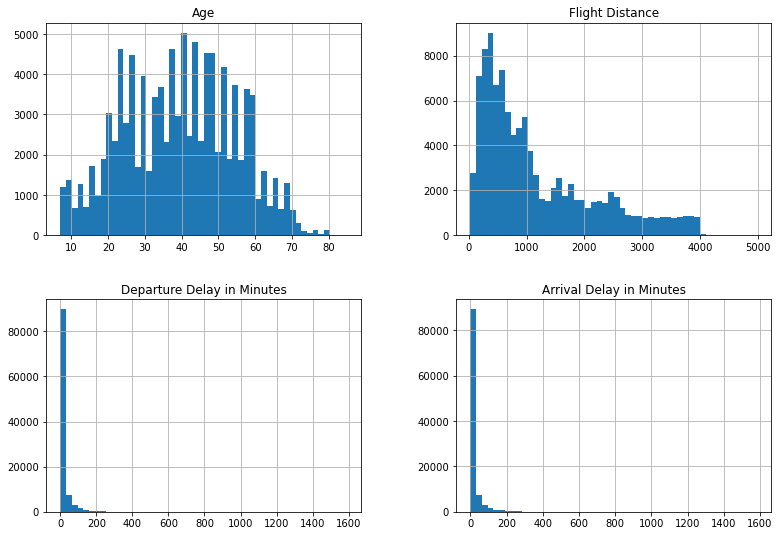

In [21]:
train[CONTINUOUS].hist(
    bins=50, 
    figsize=(13, 9)
)
plt.show()

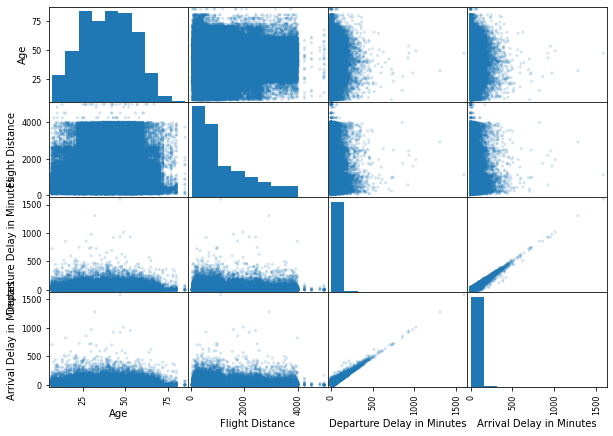

In [22]:
# Scatter Matrix for Continuous Variables
pd.plotting.scatter_matrix(
    train[CONTINUOUS], 
    alpha=0.2, 
    figsize=(10, 7)
)
plt.show()

###### Rating Variables

Pie Plot Inspiration: [src](https://www.kaggle.com/code/frixinglife/airline-passenger-satisfaction)

In [23]:
RATING_COLS = train.columns[6:20].tolist()

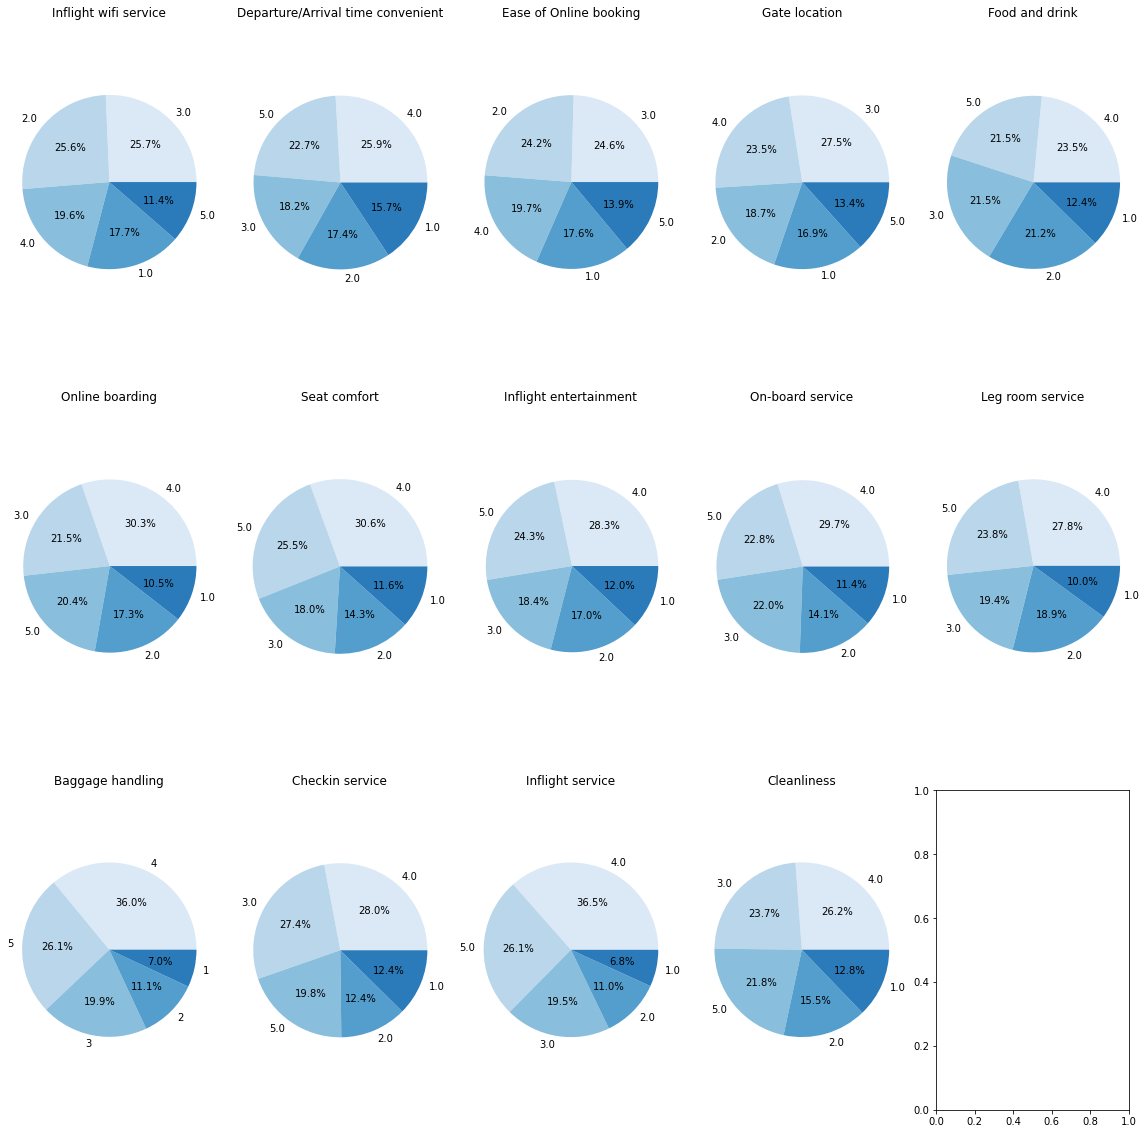

In [24]:
fig, axes = plt.subplots(
    3, 
    5, 
    figsize = (20, 20)
)
for i, c in enumerate(RATING_COLS):
    axes[i // 5, i % 5].pie(
        train[c].value_counts(), 
        labels=train[c].value_counts().index, 
        colors=sns.color_palette("Blues"), 
        autopct='%1.1f%%'
    )
    axes[i // 5, i % 5].axis('equal')
    axes[i // 5, i % 5].set_title(c)
plt.show()

## 2. Data Preprocessing

### 2.1 Feature Engineering

In [25]:
train['Average Rating'] = train[RATING_COLS].apply(
    pd.to_numeric
).mean(axis=1)

### 2.2 Cleaning Pipeline

In [26]:
X = train.drop(columns=[TARGET])
y = train[TARGET]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

In [27]:
numeric = X.select_dtypes(include=[np.number])
categorical = X.select_dtypes(include=['object'])

In [28]:
num_fields = list(numeric)
cat_fields = list(categorical)

In [29]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),                     
    ('std_scaler',  StandardScaler())                         
])
cat_pipeline = Pipeline([
    ('label_encoder', ce.OneHotEncoder())                         
])

In [30]:
pipeline = ColumnTransformer([
    ('num', num_pipeline, num_fields),
    ('cat', cat_pipeline, cat_fields)                        
])

In [31]:
X_train_prep = pipeline.fit_transform(X_train)
X_test_prep = pipeline.fit_transform(X_test)

In [32]:
X_train_prep.shape

(83123, 28)

In [33]:
X_test_prep.shape

(20781, 28)

In [34]:
FEATURES = pipeline.transformers_[1][1].named_steps['label_encoder'].get_feature_names()
FEATURES = FEATURES + num_fields

In [35]:
len(FEATURES)

28

### 2.3 Helper Functions

In [36]:
def evaluate_model(classifier, x_test, y_true, keras=False):
    """
    
    :param: classifier
    :param: x_test
    :param: y_true
    :param: keras
    """
    
    # PREDICTIONS
    y_pred = classifier.predict(x_test)
    
    if not keras:
        y_proba = classifier.predict_proba(x_test)
    else:
        y_proba = y_pred
        y_pred = np.argmax(
            y_pred,
            axis=1
        )

    # KEY METRICS
    print('\n---Key Metrics---\n')
    accuracy = accuracy_score(
        y_true, y_pred
    ) * 100
    precision = precision_score(
        y_true, y_pred, average=None, zero_division=1
    )
    precisionNegative, precisionPositive = precision * 100
    recall = recall_score(
        y_true, y_pred, average=None
    )
    recallNegative, recallPositive = recall * 100

    print(
     "Accuracy: %.2f\nPrecisionNegative: %.2f\nPrecisionPositive: %.2f\nRecallNegative: %.2f\nRecallPositive: %.2f\n" % 
          (accuracy, precisionNegative, precisionPositive, recallNegative, recallPositive)
    )

    # CONFUSION MATRIX
    print('\n---Confusion Matrix---\n')
    conf_matrix = confusion_matrix(
        y_true, y_pred
    )
    fig, ax = mlxtend.plotting.plot_confusion_matrix(
        conf_matrix
    )
    plt.show()
    
    # ROC-AUC CURVE
    print('\n---ROC-AUC Curve---\n')
    plot_roc_curve(
        y_true,
        y_proba[:,1],
        pos_label=1
    )

In [37]:
def plot_roc_curve(y_true, y_pred, pos_label=1):
    """
    
    :param: y_true
    :param: y_pred
    :param: pos_label
    """
    fpr, tpr, thresholds = roc_curve(
        y_true, 
        y_pred, 
        pos_label=pos_label
    )
    
    lr_auc = roc_auc_score(
        y_true, 
        y_pred
    )
    print('AUC Score = %.3f' % (lr_auc * 100))
    
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.plot(
        fpr, 
        tpr, 
        color='orange', 
        label='ROC'
    )
    plt.plot(
        [0, 1], 
        [0, 1], 
        color='darkblue', 
        linestyle='--'
    )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [38]:
def grid_search(classifier, data, params, scoring=None):
    """
    
    :param: classifier
    :param: data
    :param: params
    :param: scoring
    :return:
    """
    X_train, X_test, y_train, y_test = data
    
    # Grid Search CV
    grid = GridSearchCV(
        classifier, 
        params,
        scoring=scoring
    )
    grid.fit(
        X_train, 
        y_train
    )
    
    # Evaluate the Best Model
    tuned_clf = grid.best_estimator_
    print(f"Best Model:\n{tuned_clf}")
    
    evaluate_model(
        tuned_clf, 
        X_test, 
        y_test
    )
    
    return tuned_clf

In [39]:
def plot_feature_importance(importance, names, model_type):
    """
    
    :param: importance
    :param: names
    :param: model_type
    """
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={
        'feature_names': feature_names,
        'feature_importance': feature_importance
    }
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(
        by=['feature_importance'], 
        ascending=False,
        inplace=True
    )

    plt.figure(
        figsize=(10, max(8, len(names) // 3))
    )
    sns.barplot(
        x=fi_df['feature_importance'], 
        y=fi_df['feature_names']
    )

    plt.title('Feature Importance Plot for ' + model_type)
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [40]:
def plot_loss(loss, val_loss, epochs=10):
    """
    @param loss - list of trainnig loss scores for each epoch
    @param val_loss - list of validation loss scores for each epoch

    Plot training and validation loss throughout training iterations
      For each epoch (20)
    """

    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, epochs, -0.02, max(max(loss), max(val_loss))])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [41]:
def plot_accuracy(accuracy, val_accuracy, epochs=10):
    """
    @param accuracy - list of trainnig accuracy scores for each epoch
    @param val_accuracy - list of validation accuracy scores for each epoch

    Plot training and validation accuracy throughout training iterations
      For each epoch (20)
    """

    plt.plot(np.arange(len(accuracy)) + 0.5, accuracy, "b.-", label="Training accuracy")
    plt.plot(np.arange(len(val_accuracy)) + 1, val_accuracy, "r.-", label="Validation accuracy")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, epochs, -0.02, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)

## 3. Model Building

### 3.1 Decision Tree Classifier

In [42]:
dt_clf = DecisionTreeClassifier(
    max_depth=2, 
    random_state=SEED
)

dt_clf.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)


---Key Metrics---

Accuracy: 86.30
PrecisionNegative: 88.87
PrecisionPositive: 83.19
RecallNegative: 86.54
RecallPositive: 85.99


---Confusion Matrix---



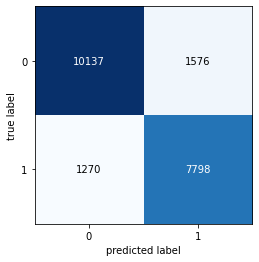


---ROC-AUC Curve---

AUC Score = 88.557


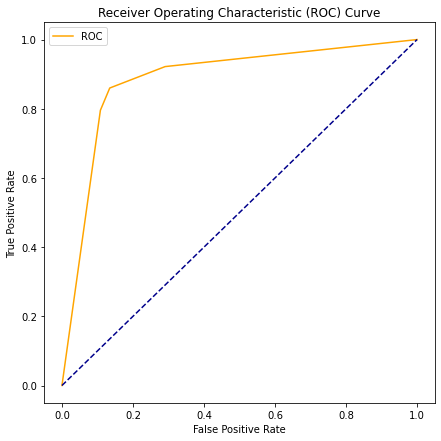

In [43]:
evaluate_model(dt_clf, X_test_prep, y_test)

### 3.2 Random Forest Classifier

In [44]:
rf_clf = RandomForestClassifier(
    n_estimators=20,
    max_depth=2,
    random_state=SEED
)

rf_clf.fit(X_train_prep, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)


---Key Metrics---

Accuracy: 86.25
PrecisionNegative: 85.35
PrecisionPositive: 87.61
RecallNegative: 91.27
RecallPositive: 79.76


---Confusion Matrix---



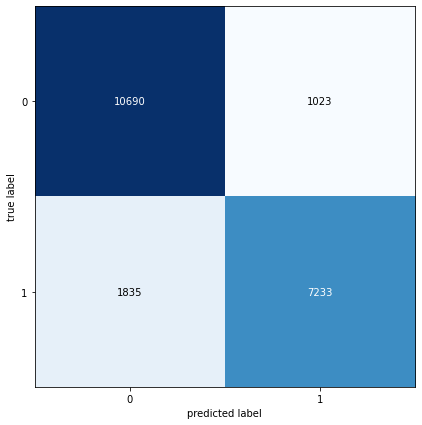


---ROC-AUC Curve---

AUC Score = 93.302


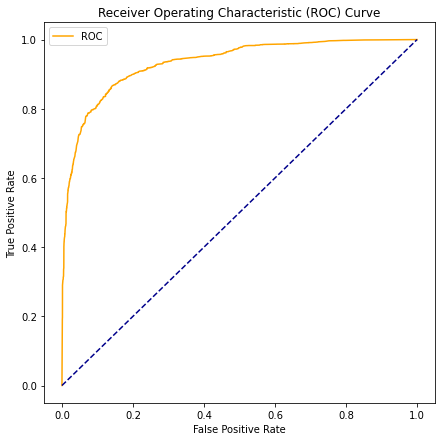

In [45]:
evaluate_model(rf_clf, X_test_prep, y_test)

### 3.3 XGBoost Classifier

In [46]:
xgb_clf = XGBClassifier(
    n_estimators=20,
    max_depth=2,
    use_label_encoder=False,
    random_state=SEED
)

xgb_clf.fit(X_train_prep, y_train, eval_metric='rmse')

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


---Key Metrics---

Accuracy: 90.98
PrecisionNegative: 90.64
PrecisionPositive: 91.46
RecallNegative: 93.67
RecallPositive: 87.51


---Confusion Matrix---



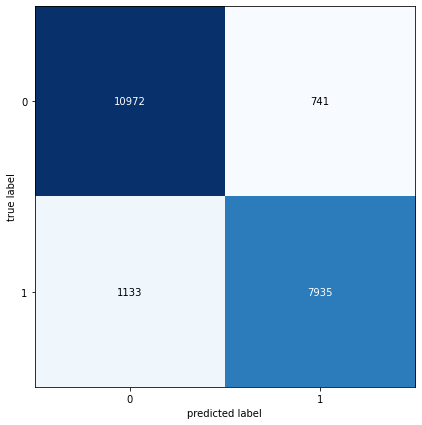


---ROC-AUC Curve---

AUC Score = 96.957


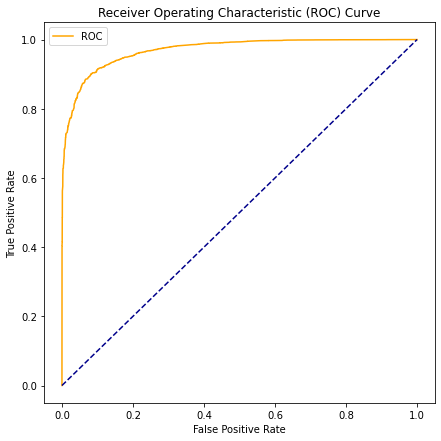

In [47]:
evaluate_model(xgb_clf, X_test_prep, y_test)

### 3.4 Gradient Boosting Classifier

In [48]:
gb_clf = GradientBoostingClassifier(
    n_estimators=20,
    max_depth=2,
    random_state=SEED
)

gb_clf.fit(X_train_prep, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=20, random_state=42)


---Key Metrics---

Accuracy: 87.96
PrecisionNegative: 89.03
PrecisionPositive: 86.57
RecallNegative: 89.70
RecallPositive: 85.72


---Confusion Matrix---



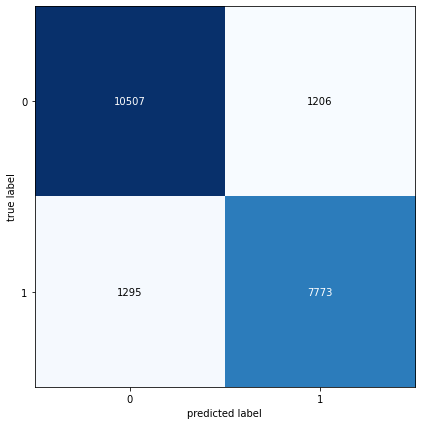


---ROC-AUC Curve---

AUC Score = 95.317


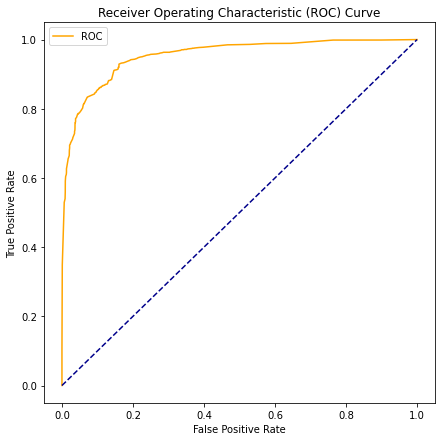

In [49]:
evaluate_model(gb_clf, X_test_prep, y_test)

### 3.5 Keras Nueral Network

In [50]:
keras.backend.clear_session()

In [51]:
dnn_clf  = keras.models.Sequential([
    # ----- Input -----                              
    keras.layers.InputLayer(
        input_shape=(28,)
    ),
    
    # F1 - Fully Connected
    keras.layers.Dense(units=64),
    # Batch Normalization
    keras.layers.BatchNormalization(),
    # ReLU Activation
    keras.layers.Activation(keras.activations.relu),
    
    # F2 - Fully Connected
    keras.layers.Dense(units=32),
    # Batch Normalization
    keras.layers.BatchNormalization(),
    # ReLU Activation
    keras.layers.Activation(keras.activations.relu),
    # 50% Dropout
    keras.layers.Dropout(0.25),
    
    # F3 - Fully Connected
    keras.layers.Dense(units=16),
    # Batch Normalization
    keras.layers.BatchNormalization(),
    # ReLU Activation
    keras.layers.Activation(keras.activations.relu),
    # 50% Dropout
    keras.layers.Dropout(0.25),
    
    # F4 - Fully Connected
    keras.layers.Dense(units=8),
    # Batch Normalization
    keras.layers.BatchNormalization(),
    # ReLU Activation
    keras.layers.Activation(keras.activations.relu),
    # 50% Dropout
    keras.layers.Dropout(0.50),
    
    # ----- Output -----
    keras.layers.Dense(units=2, activation='softmax')
])

In [52]:
dnn_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32)                0

In [53]:
EPOCHS = 15
OPTIMIZER = "adam"
LOSS = "sparse_categorical_crossentropy"
METRICS = ['accuracy']

In [54]:
dnn_clf.compile(
    loss=LOSS,
    optimizer=OPTIMIZER, 
    metrics=METRICS
)

In [55]:
history = dnn_clf.fit(
    x=X_train_prep,
    y=y_train, 
    validation_data=(X_test_prep, y_test),
    epochs=EPOCHS
)

Epoch 1/15
2598/2598 [==============================] - 4s 1ms/step - loss: 0.3430 - accuracy: 0.8504 - val_loss: 0.1780 - val_accuracy: 0.9282
Epoch 2/15
2598/2598 [==============================] - 3s 1ms/step - loss: 0.2567 - accuracy: 0.9001 - val_loss: 0.1577 - val_accuracy: 0.9336
Epoch 3/15
2598/2598 [==============================] - 3s 1ms/step - loss: 0.2423 - accuracy: 0.9049 - val_loss: 0.1482 - val_accuracy: 0.9394
Epoch 4/15
2598/2598 [==============================] - 3s 1ms/step - loss: 0.2284 - accuracy: 0.9110 - val_loss: 0.1392 - val_accuracy: 0.9411
Epoch 5/15
2598/2598 [==============================] - 3s 1ms/step - loss: 0.2189 - accuracy: 0.9139 - val_loss: 0.1375 - val_accuracy: 0.9433
Epoch 6/15
2598/2598 [==============================] - 3s 1ms/step - loss: 0.2180 - accuracy: 0.9148 - val_loss: 0.1321 - val_accuracy: 0.9436
Epoch 7/15
2598/2598 [==============================] - 3s 1ms/step - loss: 0.2131 - accuracy: 0.9162 - val_loss: 0.1304 - val_accuracy:

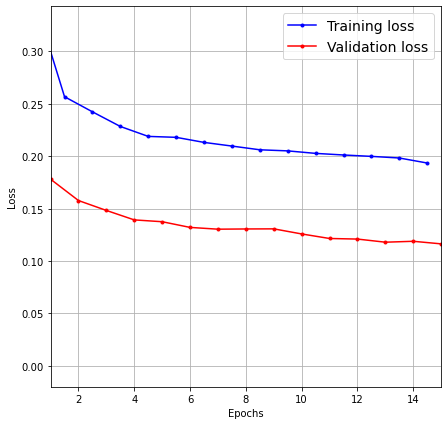

In [56]:
plot_loss(
    history.history["loss"], 
    history.history["val_loss"], 
    EPOCHS
)

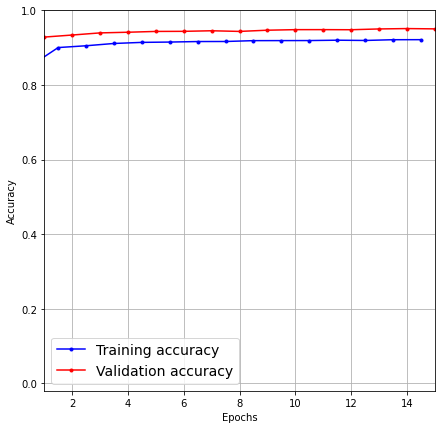

In [57]:
plot_accuracy(
    history.history["accuracy"], 
    history.history["val_accuracy"], 
    EPOCHS
)


---Key Metrics---

Accuracy: 95.01
PrecisionNegative: 94.31
PrecisionPositive: 95.99
RecallNegative: 97.01
RecallPositive: 92.43


---Confusion Matrix---



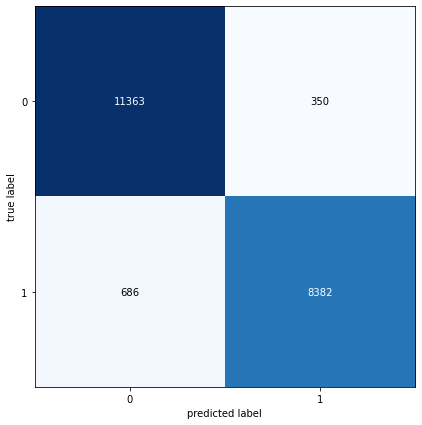


---ROC-AUC Curve---

AUC Score = 99.101


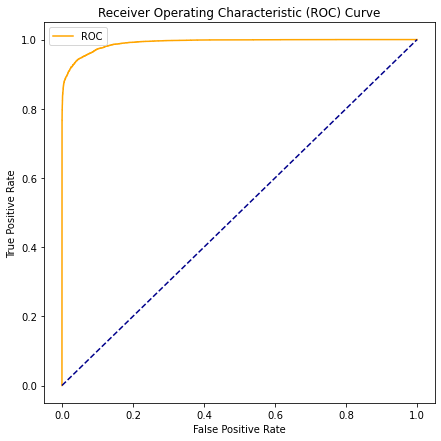

In [58]:
evaluate_model(dnn_clf, X_test_prep, y_test, keras=True)

### 3.6 Initial Model Results

|Model|ROC-AUC|Accuracy|Recall (+)|Recall (-)|Precision (+)|Precision (-)|
|-----|-------|--------|----------|---------|-------------|------------|
|Decision Tree|88.557|86.30|85.99|86.54|83.19|88.87|
|Random Forest|93.302|86.25|79.76|91.27|87.61|85.35|
|XGBoost|96.957|90.98|87.51|93.67|91.46|90.64|
|Gradient Boosting|95.317|87.96|85.72|89.70|86.57|89.03|
|Nueral Network |99.101|95.01|92.43|97.01|95.99|94.31|

## 4. Hyperparameter Tuning

### 4.1 Decision Tree

In [59]:
PARAMS = {
    'max_depth': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'log2', 'sqrt']
}

Best Model:
DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=42)

---Key Metrics---

Accuracy: 91.82
PrecisionNegative: 92.29
PrecisionPositive: 91.21
RecallNegative: 93.29
RecallPositive: 89.93


---Confusion Matrix---



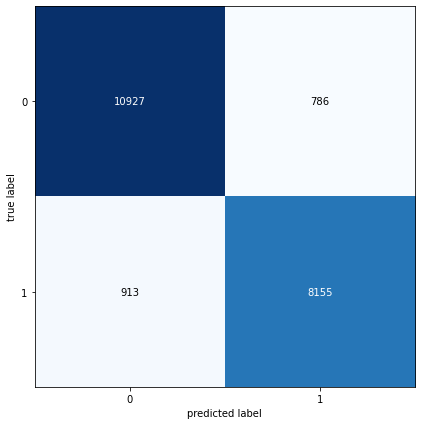


---ROC-AUC Curve---

AUC Score = 97.030


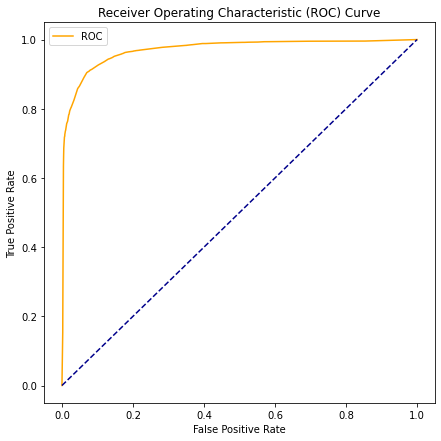

Wall time: 12.4 s


In [60]:
%%time

tuned_dt_clf = grid_search(
    DecisionTreeClassifier(
        random_state=SEED
    ), 
    (X_train_prep, X_test_prep, y_train, y_test),
    PARAMS
)

### 4.2 Random Forest

In [61]:
PARAMS = {
    "n_estimators": [10, 15, 20, 25, 30],
    "max_depth": [2, 4, 6, 8, 10],
    "criterion": ['gini', 'entropy']
}

Best Model:
RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=42)

---Key Metrics---

Accuracy: 93.90
PrecisionNegative: 93.67
PrecisionPositive: 94.21
RecallNegative: 95.64
RecallPositive: 91.65


---Confusion Matrix---



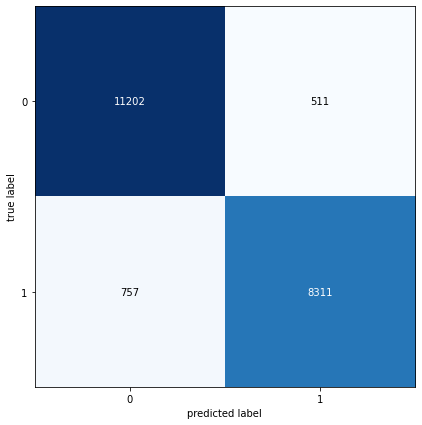


---ROC-AUC Curve---

AUC Score = 98.683


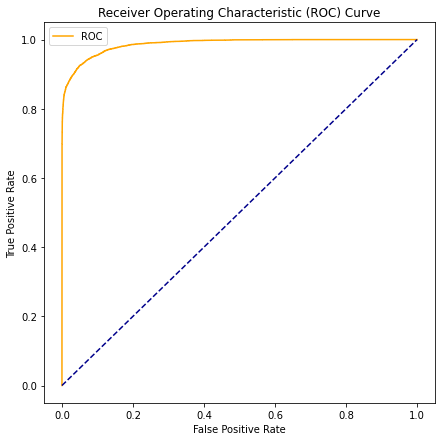

Wall time: 2min 14s


In [62]:
%%time

tuned_rf_clf = grid_search(
    RandomForestClassifier(
        random_state=SEED
    ), 
    (X_train_prep, X_test_prep, y_train, y_test),
    PARAMS
)

### 4.3 XGBoost

In [63]:
PARAMS = {
    'max_depth': [1, 2, 3],
    'n_estimators': [10, 20, 30], 
    'learning_rate': [0.0001, 0.001, 0.1, 0.3]
}

Best Model:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

---Key Metrics---

Accuracy: 93.39
PrecisionNegative: 92.53
PrecisionPositive: 94.61
RecallNegative: 96.03
RecallPositive: 89.99


---Confusion Matrix---



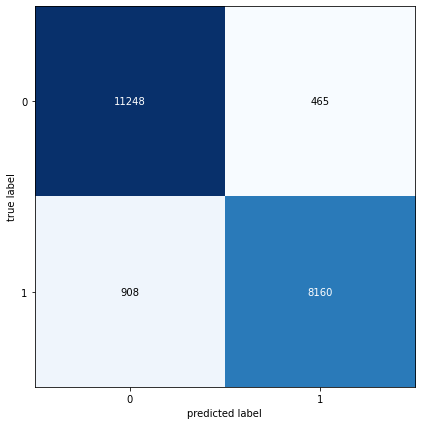


---ROC-AUC Curve---

AUC Score = 98.319


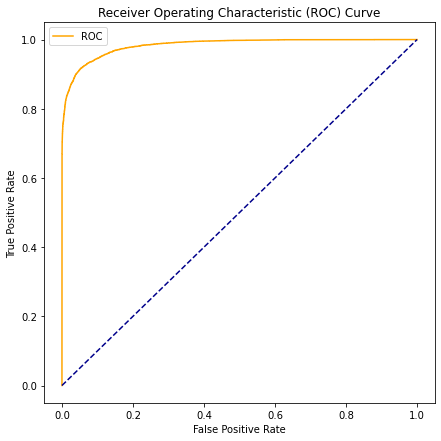

Wall time: 27.9 s


In [64]:
%%time

tuned_xgb_clf = grid_search(
    XGBClassifier(
        use_label_encoder=False,
        random_state=SEED,
        eval_metric='rmse'
    ), 
    (X_train_prep, X_test_prep, y_train, y_test),
    PARAMS
)

### 4.4 Gradient Boosting

In [65]:
PARAMS = {
    'max_depth': [1, 2, 3],
    'n_estimators': [10, 20, 30], 
    'learning_rate': [0.0001, 0.001, 0.1, 0.3]
}

Best Model:
GradientBoostingClassifier(learning_rate=0.3, n_estimators=30, random_state=42)

---Key Metrics---

Accuracy: 93.21
PrecisionNegative: 92.68
PrecisionPositive: 93.95
RecallNegative: 95.50
RecallPositive: 90.26


---Confusion Matrix---



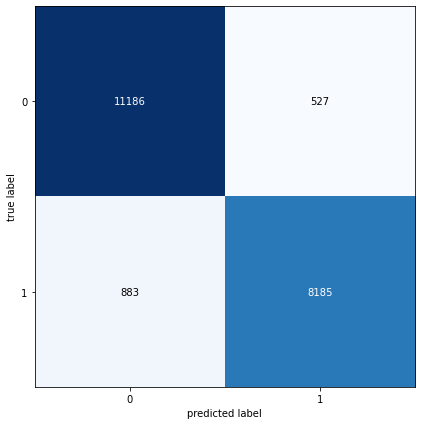


---ROC-AUC Curve---

AUC Score = 98.216


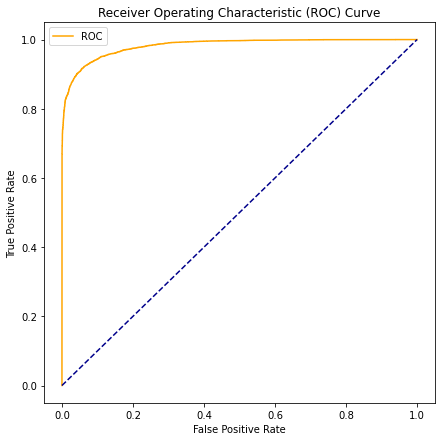

Wall time: 3min 48s


In [66]:
%%time

tuned_gb_clf = grid_search(
    GradientBoostingClassifier(
        random_state=SEED
    ), 
    (X_train_prep, X_test_prep, y_train, y_test),
    PARAMS,
    scoring='roc_auc'
)

### 4.5 Tuned Model Results

|Model|ROC-AUC|Accuracy|Recall (+)|Recall (-)|Precision (+)|Precision (-)|
|-----|-------|--------|----------|---------|-------------|------------|
|Decision Tree|97.030|91.82|89.93|93.29|91.21|92.29|
|Random Forest|98.683|93.90|91.65|95.64|94.21|93.67|
|XGBoost|98.319|93.39|89.99|96.03|94.61|92.53|
|Gradient Boosting|98.216|93.21|90.26|95.50|93.95|92.68|

## 5. Final Testing

### 5.1 Test Set Preprocessing

In [67]:
# Convert Target Variable to Binary (0/1)
test[TARGET] = np.where(
    test[TARGET] == "satisfied",
    1,
    0
)
test[TARGET] = test[TARGET]

In [68]:
# Drop Useless Columns
test.drop(
    columns=['id'],
    inplace=True
)

In [69]:
# Replace 0 with NaN
# ---> 0 actually is missing value for rating columns
print("Actual Number of Missing Values for Ratings:", (test[test.columns.tolist()[6:20]] == 0).sum().sum())
test[test.columns.tolist()[6:20]] = test[test.columns.tolist()[6:20]].replace(0, np.nan)

Actual Number of Missing Values for Ratings: 4202


In [70]:
test['Average Rating'] = test[test.columns[6:20]].apply(
    pd.to_numeric
).mean(axis=1)

In [71]:
X = test.drop(columns=[TARGET])
y_final = test[TARGET]

In [72]:
numeric = X.select_dtypes(include=[np.number])
categorical = X.select_dtypes(include=['object'])

In [73]:
num_fields = list(numeric)
cat_fields = list(categorical)

In [74]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),                     
    ('std_scaler',  StandardScaler())                         
])
cat_pipeline = Pipeline([
    ('label_encoder', ce.OneHotEncoder())                         
])

In [75]:
pipeline = ColumnTransformer([
    ('num', num_pipeline, num_fields),
    ('cat', cat_pipeline, cat_fields)                        
])

In [76]:
X_final_prep = pipeline.fit_transform(X)

In [77]:
X_final_prep.shape

(25976, 28)

### 5.2 Optimal Model Performance

In [78]:
optimal_model = tuned_xgb_clf


---Key Metrics---

Accuracy: 67.79
PrecisionNegative: 67.54
PrecisionPositive: 68.33
RecallNegative: 82.00
RecallPositive: 49.64


---Confusion Matrix---



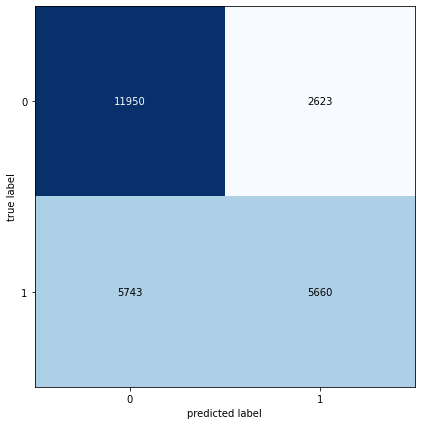


---ROC-AUC Curve---

AUC Score = 80.444


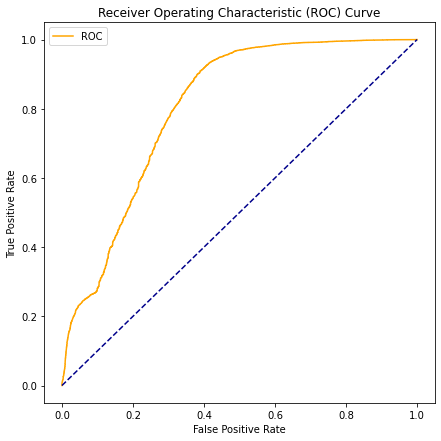

In [79]:
evaluate_model(optimal_model, X_final_prep, y_final)

### 5.3 Feature Importance

In [80]:
importance = optimal_model.feature_importances_
names = FEATURES
model_type = "Post-Tune XGBoost Classifier"

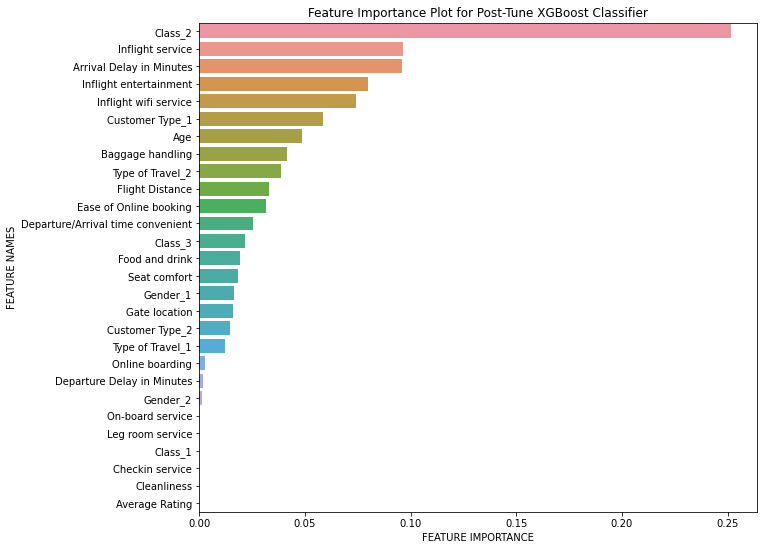

In [81]:
plot_feature_importance(
    importance,
    names,
    model_type
)